In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

from shapely.geometry import Point
from shapely.geometry import Polygon
import geopandas as gpd

In [2]:
# Reading trip data

may_trip = pd.read_csv('data/may_trip.csv')

In [3]:
may_trip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01 00:00:00,00:00:20.460000,2019-05-01 00:00:00,00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000
1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00,00:01:50.090000,2019-05-01 00:00:00,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000
2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01 00:00:00,00:03:47.363333,2019-05-01 00:00:00,00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000
3,2019-05-01 00:05:55.570000,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01 00:00:00,00:04:21.386666,2019-05-01 00:00:00,00:06:59.176666,36.14940,-86.77950,36.15310,-86.77960,"[[36.149741,-86.779344],[36.149741,-86.779327]...",2019-05-02 05:30:24.237000
4,2019-05-01 00:05:55.570000,Bird,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01 00:00:00,00:04:27.796666,2019-05-01 00:00:00,00:06:23.150000,36.17780,-86.78660,36.17740,-86.78760,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207000


In [4]:
may_trip.memory_usage(deep=True) * 1e-6

Index               0.000072
pubTimeStamp       15.024553
companyName        10.169113
tripRecordNum      10.713873
sumdID             12.994028
tripDuration        1.799752
tripDistance        1.799752
startDate          13.498140
startTime          11.775638
endDate            13.498140
endTime            11.775813
startLatitude       1.799752
startLongitude      1.799752
endLatitude         1.799752
endLongitude        1.799752
tripRoute         303.826392
create_dt          15.066518
dtype: float64

In [5]:
may_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224969 entries, 0 to 224968
Data columns (total 16 columns):
pubTimeStamp      224969 non-null object
companyName       224969 non-null object
tripRecordNum     224969 non-null object
sumdID            224969 non-null object
tripDuration      224969 non-null float64
tripDistance      224969 non-null float64
startDate         224969 non-null object
startTime         224969 non-null object
endDate           224969 non-null object
endTime           224969 non-null object
startLatitude     224969 non-null float64
startLongitude    224969 non-null float64
endLatitude       224969 non-null float64
endLongitude      224969 non-null float64
tripRoute         224969 non-null object
create_dt         224969 non-null object
dtypes: float64(6), object(10)
memory usage: 27.5+ MB


In [6]:
# Changing type of some columns so that memory is used efficiently

may_trip.pubTimeStamp = pd.to_datetime(may_trip.pubTimeStamp)
may_trip.startDate = pd.to_datetime(may_trip.startDate)
may_trip.startTime = pd.to_datetime(may_trip.startTime).dt.time
may_trip.endDate = pd.to_datetime(may_trip.endDate)
may_trip.endTime = pd.to_datetime(may_trip.endTime).dt.time
may_trip.create_dt = pd.to_datetime(may_trip.create_dt)

may_trip.memory_usage(deep=True).sum() * 1e-6

377.298022

In [7]:
may_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224969 entries, 0 to 224968
Data columns (total 16 columns):
pubTimeStamp      224969 non-null datetime64[ns]
companyName       224969 non-null object
tripRecordNum     224969 non-null object
sumdID            224969 non-null object
tripDuration      224969 non-null float64
tripDistance      224969 non-null float64
startDate         224969 non-null datetime64[ns]
startTime         224969 non-null object
endDate           224969 non-null datetime64[ns]
endTime           224969 non-null object
startLatitude     224969 non-null float64
startLongitude    224969 non-null float64
endLatitude       224969 non-null float64
endLongitude      224969 non-null float64
tripRoute         224969 non-null object
create_dt         224969 non-null datetime64[ns]
dtypes: datetime64[ns](4), float64(6), object(6)
memory usage: 27.5+ MB


In [8]:
may_trip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-05-01 00:00:55.423,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01,00:00:20.460000,2019-05-01,00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780
1,2019-05-01 00:03:33.147,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01,00:01:50.090000,2019-05-01,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757
2,2019-05-01 00:05:55.570,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01,00:03:47.363333,2019-05-01,00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530
3,2019-05-01 00:05:55.570,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01,00:04:21.386666,2019-05-01,00:06:59.176666,36.14940,-86.77950,36.15310,-86.77960,"[[36.149741,-86.779344],[36.149741,-86.779327]...",2019-05-02 05:30:24.237
4,2019-05-01 00:05:55.570,Bird,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01,00:04:27.796666,2019-05-01,00:06:23.150000,36.17780,-86.78660,36.17740,-86.78760,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207


In [9]:
# Eleminating the trips whose trip distance is lower than 3 meters or 9.84 ft

may_trip = may_trip[may_trip.tripDistance>9.84]
may_trip.shape

(204323, 16)

#### Removing by trip duration

In [10]:
# If trip duration smaller than 1 minute or greater than 24 hours, we do not count that as a real trip

may_trip = may_trip[may_trip.tripDuration<24*60][may_trip.tripDuration>1].reset_index(drop=True)
may_trip.shape

c:\programdata\anaconda3\envs\tmp\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(202117, 16)

#### Removing the duplicates 

In [11]:
may_trip.sort_values(by=['startDate', 'startTime', 'startLatitude', 'startLongitude', 'endLatitude', 'endLongitude']).tail(25)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
201697,2019-06-01 00:00:46.727,Bird,BRD3547,PoweredXUVRV,2.000000,2952.75600,2019-05-31,23:59:25.016666,2019-06-01,00:01:45.613333,36.145800,-86.786300,36.145800,-86.786600,"[[36.145845,-86.786552],[36.145845,-86.786552]]",2019-06-02 05:30:19.727
201801,2019-06-01 00:50:25.740,Lime,LIM120,PoweredNWFIHO55UB76B,23.716667,11190.80880,2019-05-31,23:59:28,2019-06-01,00:23:11,36.145034,-86.809334,36.159594,-86.780527,"[[36.14503,-86.80933],[36.1449,-86.80938],[36....",2019-06-02 07:33:54.660
201839,2019-06-01 14:50:36.030,Lime,LIM1424,PoweredNWFIHO55UB76B,23.716667,11190.80880,2019-05-31,23:59:28,2019-06-01,00:23:11,36.145034,-86.809334,36.159594,-86.780527,"[[36.14503,-86.80933],[36.1449,-86.80938],[36....",2019-06-02 07:45:30.110
201892,2019-06-01 19:50:39.440,Lime,LIM2783,PoweredNWFIHO55UB76B,23.716667,11190.80880,2019-05-31,23:59:28,2019-06-01,00:23:11,36.145034,-86.809334,36.159594,-86.780527,"[[36.14503,-86.80933],[36.1449,-86.80938],[36....",2019-06-02 07:53:24.443
201943,2019-06-01 20:50:39.690,Lime,LIM3123,PoweredNWFIHO55UB76B,23.716667,11190.80880,2019-05-31,23:59:28,2019-06-01,00:23:11,36.145034,-86.809334,36.159594,-86.780527,"[[36.14503,-86.80933],[36.1449,-86.80938],[36....",2019-06-02 07:55:43.797
201997,2019-06-01 21:50:41.650,Lime,LIM3508,PoweredNWFIHO55UB76B,23.716667,11190.80880,2019-05-31,23:59:28,2019-06-01,00:23:11,36.145034,-86.809334,36.159594,-86.780527,"[[36.14503,-86.80933],[36.1449,-86.80938],[36....",2019-06-02 07:58:20.230
202047,2019-06-01 22:50:41.203,Lime,LIM3876,PoweredNWFIHO55UB76B,23.716667,11190.80880,2019-05-31,23:59:28,2019-06-01,00:23:11,36.145034,-86.809334,36.159594,-86.780527,"[[36.14503,-86.80933],[36.1449,-86.80938],[36....",2019-06-02 08:01:13.570
202096,2019-06-01 23:50:41.577,Lime,LIM4192,PoweredNWFIHO55UB76B,23.716667,11190.80880,2019-05-31,23:59:28,2019-06-01,00:23:11,36.145034,-86.809334,36.159594,-86.780527,"[[36.14503,-86.80933],[36.1449,-86.80938],[36....",2019-06-02 08:04:20.737
201693,2019-06-01 00:00:46.727,Bird,BRD3546,Powered18M6E,2.000000,5249.34400,2019-05-31,23:59:28.466666,2019-06-01,00:01:32.903333,36.157900,-86.778600,36.157400,-86.779900,"[[36.157425,-86.779818]]",2019-06-02 05:30:19.693
201786,2019-06-01 00:50:25.703,Lime,LIM53,PoweredTUYG2UYJLVFQE,11.200000,3618.72240,2019-05-31,23:59:38,2019-06-01,00:10:50,36.164815,-86.780562,36.161835,-86.772527,"[[36.16363,-86.78041],[36.16204,-86.77857],[36...",2019-06-02 07:33:51.750


Some of the trips have more than only one record.

In order to understand these trips, I look [ u'companyName', u'sumdID', u'tripDuration',
       u'tripDistance', u'startDate', u'startTime', u'endDate', u'endTime',
       u'startLatitude', u'startLongitude', u'endLatitude', u'endLongitude',
       u'tripRoute'] columns.

If all values of these columns are same, I can say that the trips are exactly same but more than one record is created for these trips.

In [12]:
# The number of duplicated rows

may_trip[may_trip.duplicated(subset=[ u'companyName', u'sumdID', u'tripDuration',
       u'tripDistance', u'startDate', u'startTime', u'endDate', u'endTime',
       u'startLatitude', u'startLongitude', u'endLatitude', u'endLongitude',
       u'tripRoute'], keep=False)].shape

(29802, 16)

In [13]:
# The number of rows should be cleaned. I will keep first for each duplicates

may_trip[may_trip.duplicated(subset=[ u'companyName', u'sumdID', u'tripDuration',
       u'tripDistance', u'startDate', u'startTime', u'endDate', u'endTime',
       u'startLatitude', u'startLongitude', u'endLatitude', u'endLongitude',
       u'tripRoute'], keep='first')].shape

(23789, 16)

In [14]:
# Dropping the duplicates

may_trip = may_trip.drop_duplicates(subset=[ u'companyName', u'sumdID', u'tripDuration',
       u'tripDistance', u'startDate', u'startTime', u'endDate', u'endTime',
       u'startLatitude', u'startLongitude', u'endLatitude', u'endLongitude',
       u'tripRoute'], keep='first')

may_trip.shape

(178328, 16)

### Priomise zones

In [15]:
promise = gpd.read_file('MDHA_Promise_Zones/Export_Output_5.shp').to_crs({'init':'epsg:4326'})
promise.head()

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,POLYGON ((-86.76297000024967 36.19363899926637...
1,2,2,7.670585e+07,45226.018917,"POLYGON ((-86.77837899970074 36.1488919994517,..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((-86.7077109999278 36.16723400046492,..."
3,4,4,2.713638e+08,74348.596054,POLYGON ((-86.74735299958611 36.13036199936352...
4,5,5,3.928178e+08,106661.712102,POLYGON ((-86.78489600025182 36.23357799967432...


In [16]:
# Geometry for a trip will be the start location

may_trip['geometry'] = may_trip.apply(lambda x: Point((float(x.startLongitude), float(x.startLatitude))), axis=1)
may_trip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry
0,2019-05-01 00:00:55.423,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01,00:00:20.460000,2019-05-01,00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780,POINT (-86.8036 36.1571)
1,2019-05-01 00:03:33.147,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01,00:01:50.090000,2019-05-01,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757,POINT (-86.77896 36.15797)
2,2019-05-01 00:05:55.570,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01,00:03:47.363333,2019-05-01,00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530,POINT (-86.7818 36.1547)
3,2019-05-01 00:05:55.570,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01,00:04:21.386666,2019-05-01,00:06:59.176666,36.14940,-86.77950,36.15310,-86.77960,"[[36.149741,-86.779344],[36.149741,-86.779327]...",2019-05-02 05:30:24.237,POINT (-86.7795 36.1494)
4,2019-05-01 00:05:55.570,Bird,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01,00:04:27.796666,2019-05-01,00:06:23.150000,36.17780,-86.78660,36.17740,-86.78760,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207,POINT (-86.78660000000001 36.1778)


In [17]:
may_trip_geo = gpd.GeoDataFrame(may_trip, crs = promise.crs, geometry = may_trip['geometry'])
may_trip_geo.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry
0,2019-05-01 00:00:55.423,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01,00:00:20.460000,2019-05-01,00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780,POINT (-86.8036 36.1571)
1,2019-05-01 00:03:33.147,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01,00:01:50.090000,2019-05-01,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757,POINT (-86.77896 36.15797)
2,2019-05-01 00:05:55.570,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01,00:03:47.363333,2019-05-01,00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530,POINT (-86.7818 36.1547)
3,2019-05-01 00:05:55.570,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01,00:04:21.386666,2019-05-01,00:06:59.176666,36.14940,-86.77950,36.15310,-86.77960,"[[36.149741,-86.779344],[36.149741,-86.779327]...",2019-05-02 05:30:24.237,POINT (-86.7795 36.1494)
4,2019-05-01 00:05:55.570,Bird,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01,00:04:27.796666,2019-05-01,00:06:23.150000,36.17780,-86.78660,36.17740,-86.78760,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207,POINT (-86.78660000000001 36.1778)


In [18]:
# I will look the trips starting in the promise zones

may_trip_promise = gpd.sjoin(may_trip_geo, promise, op = 'within')
may_trip_promise = may_trip_promise.drop(columns=['index_right','OBJECTID']).reset_index(drop=True)

may_trip_promise.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry,ZONE_ID,SHAPE_STAr,SHAPE_STLe
0,2019-05-01 00:00:55.423,Bird,BRD2134,Powered9EAJL,3.000000,958.00528,2019-05-01,00:00:20.460000,2019-05-01,00:02:52.346666,36.15710,-86.80360,36.15660,-86.8067,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780,POINT (-86.8036 36.1571),5,3.928178e+08,106661.712102
1,2019-05-01 00:05:55.570,Bird,BRD2165,PoweredJ7MB3,2.000000,351.04988,2019-05-01,00:04:27.796666,2019-05-01,00:06:23.150000,36.17780,-86.78660,36.17740,-86.7876,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207,POINT (-86.78660000000001 36.1778),5,3.928178e+08,106661.712102
2,2019-05-01 00:10:56.013,Bird,BRD2193,PoweredSX2AW,6.000000,2624.67200,2019-05-01,00:06:34.436666,2019-05-01,00:12:48.676666,36.17080,-86.78930,36.17460,-86.7860,"[[36.170995,-86.789593],[36.173193,-86.791207]...",2019-05-02 05:30:24.833,POINT (-86.7893 36.1708),5,3.928178e+08,106661.712102
3,2019-05-01 00:15:55.977,Bird,BRD2212,PoweredVGMWJ,10.000000,5249.34400,2019-05-01,00:07:07.963333,2019-05-01,00:16:58.763333,36.17650,-86.78470,36.16590,-86.7762,"[[36.176602,-86.784681],[36.177094,-86.784293]...",2019-05-02 05:30:25.317,POINT (-86.7847 36.1765),5,3.928178e+08,106661.712102
4,2019-05-01 00:25:34.000,Lyft,LFT42,Powered906727,14.803383,2004.59324,2019-05-01,00:10:45.676666,2019-05-01,00:25:33.880000,36.17546,-86.79429,36.17546,-86.7941,"[[36.17546,-86.79429],[36.17541,-86.79422],[36...",2019-05-02 07:20:33.947,POINT (-86.79429 36.17546),5,3.928178e+08,106661.712102


In [19]:
# I will look how many trips started in each zones

may_zones = may_trip_promise[['ZONE_ID', 'pubTimeStamp']].groupby(by='ZONE_ID').count()
may_zones.columns = ['trip_counts']
may_zones = may_zones.reset_index()

may_zones

,ZONE_ID,trip_counts
0,1,13881
1,2,9349
2,3,521
3,4,102
4,5,12760
5,6,47


In [20]:
promise

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
index_right,,,,,
0,1,1,1.053728e+08,49364.601403,POLYGON ((-86.76297000024967 36.19363899926637...
1,2,2,7.670585e+07,45226.018917,"POLYGON ((-86.77837899970074 36.1488919994517,..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((-86.7077109999278 36.16723400046492,..."
3,4,4,2.713638e+08,74348.596054,POLYGON ((-86.74735299958611 36.13036199936352...
4,5,5,3.928178e+08,106661.712102,POLYGON ((-86.78489600025182 36.23357799967432...
5,6,6,9.535996e+07,59256.923574,POLYGON ((-86.85223000066351 36.16416999981948...


In [21]:
# Getting geometry for zones

may_zones['geometry'] = promise.geometry.centroid
may_zones

,ZONE_ID,trip_counts,geometry
0,1,13881,POINT (-86.76416231438185 36.17641363522559)
1,2,9349,POINT (-86.77976370264447 36.13859831184634)
2,3,521,POINT (-86.72581019967478 36.14281445286312)
3,4,102,POINT (-86.74062022251979 36.10276613731659)
4,5,12760,POINT (-86.80486029744616 36.18972330570404)
5,6,47,POINT (-86.86376948003836 36.15331332566165)


In [22]:
# Creating geodf for trip counts for each zones

may_zones_geo = gpd.GeoDataFrame(may_zones, crs = promise.crs, geometry = may_zones['geometry'])
may_zones_geo

,ZONE_ID,trip_counts,geometry
0,1,13881,POINT (-86.76416231438185 36.17641363522559)
1,2,9349,POINT (-86.77976370264447 36.13859831184634)
2,3,521,POINT (-86.72581019967478 36.14281445286312)
3,4,102,POINT (-86.74062022251979 36.10276613731659)
4,5,12760,POINT (-86.80486029744616 36.18972330570404)
5,6,47,POINT (-86.86376948003836 36.15331332566165)


In [23]:
may_zones_promise = gpd.sjoin(may_zones_geo, promise, op = 'within')
may_zones_promise = may_zones_promise.drop(columns=[u'index_right',  u'OBJECTID', u'ZONE_ID_right'])
may_zones_promise['zone_percentage'] = 100*may_zones_promise.trip_counts/may_zones_promise.trip_counts.sum()
may_zones_promise = may_zones_promise.rename(columns = {'ZONE_ID_left': 'zone_id'})

may_zones_promise

,zone_id,trip_counts,geometry,SHAPE_STAr,SHAPE_STLe,zone_percentage
0,1,13881,POINT (-86.76416231438185 36.17641363522559),1.053728e+08,49364.601403,37.864157
1,2,9349,POINT (-86.77976370264447 36.13859831184634),7.670585e+07,45226.018917,25.501909
2,3,521,POINT (-86.72581019967478 36.14281445286312),2.985488e+08,75207.067487,1.421167
3,4,102,POINT (-86.74062022251979 36.10276613731659),2.713638e+08,74348.596054,0.278232
4,5,12760,POINT (-86.80486029744616 36.18972330570404),3.928178e+08,106661.712102,34.806328
5,6,47,POINT (-86.86376948003836 36.15331332566165),9.535996e+07,59256.923574,0.128205


In [24]:
nashville_center = (36.16127, -86.77756)

In [25]:
map_downtown = folium.Map(location = nashville_center, zoom_start = 11)
folium.GeoJson(promise).add_to(map_downtown)
for row in may_zones_promise.iterrows():
    row_values = row[1]
    folium.Circle(
        location=(row_values.geometry.y,row_values.geometry.x),
        popup=('Zone: ' + str(row_values.zone_id) + '<br/>' +
            'Trip counts: ' + str(row_values.trip_counts)),
        radius=row_values.zone_percentage*20,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(map_downtown)

map_downtown

In [26]:
may_trip_promise.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry,ZONE_ID,SHAPE_STAr,SHAPE_STLe
0,2019-05-01 00:00:55.423,Bird,BRD2134,Powered9EAJL,3.000000,958.00528,2019-05-01,00:00:20.460000,2019-05-01,00:02:52.346666,36.15710,-86.80360,36.15660,-86.8067,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780,POINT (-86.8036 36.1571),5,3.928178e+08,106661.712102
1,2019-05-01 00:05:55.570,Bird,BRD2165,PoweredJ7MB3,2.000000,351.04988,2019-05-01,00:04:27.796666,2019-05-01,00:06:23.150000,36.17780,-86.78660,36.17740,-86.7876,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207,POINT (-86.78660000000001 36.1778),5,3.928178e+08,106661.712102
2,2019-05-01 00:10:56.013,Bird,BRD2193,PoweredSX2AW,6.000000,2624.67200,2019-05-01,00:06:34.436666,2019-05-01,00:12:48.676666,36.17080,-86.78930,36.17460,-86.7860,"[[36.170995,-86.789593],[36.173193,-86.791207]...",2019-05-02 05:30:24.833,POINT (-86.7893 36.1708),5,3.928178e+08,106661.712102
3,2019-05-01 00:15:55.977,Bird,BRD2212,PoweredVGMWJ,10.000000,5249.34400,2019-05-01,00:07:07.963333,2019-05-01,00:16:58.763333,36.17650,-86.78470,36.16590,-86.7762,"[[36.176602,-86.784681],[36.177094,-86.784293]...",2019-05-02 05:30:25.317,POINT (-86.7847 36.1765),5,3.928178e+08,106661.712102
4,2019-05-01 00:25:34.000,Lyft,LFT42,Powered906727,14.803383,2004.59324,2019-05-01,00:10:45.676666,2019-05-01,00:25:33.880000,36.17546,-86.79429,36.17546,-86.7941,"[[36.17546,-86.79429],[36.17541,-86.79422],[36...",2019-05-02 07:20:33.947,POINT (-86.79429 36.17546),5,3.928178e+08,106661.712102


#### I will calculate the time difference between two trips

Idle time will be the time interval between two consecutive trips for a scooter.

If idle time is smaller at a location, I can say that the scooter is needed there.

Hence I will calculate idle times and calculate average idle times for each location regions

In [27]:
sorted_may_trip_promise = may_trip_promise.sort_values(
    by=['companyName', 'sumdID', 'pubTimeStamp']).reset_index(drop=True)

In [28]:
# Changed is 1 if the scooter is changed and 0 if the scooter is same.
sorted_may_trip_promise['changed'] = sorted_may_trip_promise['sumdID'].ne(
    sorted_may_trip_promise['sumdID'].shift().bfill()).astype(int)

In [29]:
sorted_may_trip_promise.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry,ZONE_ID,SHAPE_STAr,SHAPE_STLe,changed
0,2019-05-15 04:27:16.460,Bird,BRD3354,Powered125HI,22.0,4921.260,2019-05-15,04:06:44.160000,2019-05-15,04:28:24.633333,...,-86.7720,36.1614,-86.7774,"[[36.162458,-86.771755],[36.162588,-86.771566]...",2019-05-16 05:30:49.727,POINT (-86.77200000000001 36.1622),1,1.053728e+08,49364.601403,0
1,2019-05-17 03:49:26.133,Bird,BRD3567,Powered125HI,68.0,41338.584,2019-05-17,02:42:58.946666,2019-05-17,03:50:44.820000,...,-86.7698,36.1612,-86.7643,"[[36.164704,-86.76988],[36.164373,-86.770666],...",2019-05-18 05:30:46.813,POINT (-86.7698 36.1646),1,1.053728e+08,49364.601403,0
2,2019-05-24 22:03:05.157,Bird,BRD2853,Powered125HI,6.0,2296.588,2019-05-24,21:58:09.946666,2019-05-24,22:04:14.436666,...,-86.8017,36.1642,-86.7962,"[[36.164835,-86.801644],[36.164876,-86.801386]...",2019-05-25 05:31:39.013,POINT (-86.8017 36.1647),5,3.928178e+08,106661.712102,0
3,2019-05-25 00:13:11.623,Bird,BRD3680,Powered125HI,6.0,4921.260,2019-05-25,00:08:23.830000,2019-05-25,00:14:21.310000,...,-86.7922,36.1648,-86.8018,"[[36.164432,-86.792261],[36.164218,-86.792703]...",2019-05-26 05:30:26.190,POINT (-86.79219999999999 36.1642),5,3.928178e+08,106661.712102,0
4,2019-05-04 20:20:25.630,Bird,BRD3150,Powered12J9T,4.0,656.168,2019-05-04,20:16:35.576666,2019-05-04,20:20:46.903333,...,-86.7873,36.1479,-86.7858,"[[36.147226,-86.787164],[36.147509,-86.787051]...",2019-05-05 05:31:45.720,POINT (-86.7873 36.1472),2,7.670585e+07,45226.018917,1


In [30]:
# Converting start time and end time to datetime (Uniting the date and time)
sorted_may_trip_promise['start_datetime'] = pd.to_datetime(
    sorted_may_trip_promise.startDate.astype(str) + ' ' + 
    sorted_may_trip_promise.startTime.astype(str))
sorted_may_trip_promise['end_datetime'] = pd.to_datetime(
    sorted_may_trip_promise.endDate.astype(str) + ' ' + 
    sorted_may_trip_promise.endTime.astype(str))
sorted_may_trip_promise.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,endLongitude,tripRoute,create_dt,geometry,ZONE_ID,SHAPE_STAr,SHAPE_STLe,changed,start_datetime,end_datetime
0,2019-05-15 04:27:16.460,Bird,BRD3354,Powered125HI,22.0,4921.260,2019-05-15,04:06:44.160000,2019-05-15,04:28:24.633333,...,-86.7774,"[[36.162458,-86.771755],[36.162588,-86.771566]...",2019-05-16 05:30:49.727,POINT (-86.77200000000001 36.1622),1,1.053728e+08,49364.601403,0,2019-05-15 04:06:44.160000,2019-05-15 04:28:24.633333
1,2019-05-17 03:49:26.133,Bird,BRD3567,Powered125HI,68.0,41338.584,2019-05-17,02:42:58.946666,2019-05-17,03:50:44.820000,...,-86.7643,"[[36.164704,-86.76988],[36.164373,-86.770666],...",2019-05-18 05:30:46.813,POINT (-86.7698 36.1646),1,1.053728e+08,49364.601403,0,2019-05-17 02:42:58.946666,2019-05-17 03:50:44.820000
2,2019-05-24 22:03:05.157,Bird,BRD2853,Powered125HI,6.0,2296.588,2019-05-24,21:58:09.946666,2019-05-24,22:04:14.436666,...,-86.7962,"[[36.164835,-86.801644],[36.164876,-86.801386]...",2019-05-25 05:31:39.013,POINT (-86.8017 36.1647),5,3.928178e+08,106661.712102,0,2019-05-24 21:58:09.946666,2019-05-24 22:04:14.436666
3,2019-05-25 00:13:11.623,Bird,BRD3680,Powered125HI,6.0,4921.260,2019-05-25,00:08:23.830000,2019-05-25,00:14:21.310000,...,-86.8018,"[[36.164432,-86.792261],[36.164218,-86.792703]...",2019-05-26 05:30:26.190,POINT (-86.79219999999999 36.1642),5,3.928178e+08,106661.712102,0,2019-05-25 00:08:23.830000,2019-05-25 00:14:21.310000
4,2019-05-04 20:20:25.630,Bird,BRD3150,Powered12J9T,4.0,656.168,2019-05-04,20:16:35.576666,2019-05-04,20:20:46.903333,...,-86.7858,"[[36.147226,-86.787164],[36.147509,-86.787051]...",2019-05-05 05:31:45.720,POINT (-86.7873 36.1472),2,7.670585e+07,45226.018917,1,2019-05-04 20:16:35.576666,2019-05-04 20:20:46.903333


In [31]:
# The time difference between two consecutive trips

sorted_may_trip_promise['idle_time'] = (sorted_may_trip_promise.start_datetime - 
                                        sorted_may_trip_promise.end_datetime.shift())
sorted_may_trip_promise.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,tripRoute,create_dt,geometry,ZONE_ID,SHAPE_STAr,SHAPE_STLe,changed,start_datetime,end_datetime,idle_time
0,2019-05-15 04:27:16.460,Bird,BRD3354,Powered125HI,22.0,4921.260,2019-05-15,04:06:44.160000,2019-05-15,04:28:24.633333,...,"[[36.162458,-86.771755],[36.162588,-86.771566]...",2019-05-16 05:30:49.727,POINT (-86.77200000000001 36.1622),1,1.053728e+08,49364.601403,0,2019-05-15 04:06:44.160000,2019-05-15 04:28:24.633333,NaT
1,2019-05-17 03:49:26.133,Bird,BRD3567,Powered125HI,68.0,41338.584,2019-05-17,02:42:58.946666,2019-05-17,03:50:44.820000,...,"[[36.164704,-86.76988],[36.164373,-86.770666],...",2019-05-18 05:30:46.813,POINT (-86.7698 36.1646),1,1.053728e+08,49364.601403,0,2019-05-17 02:42:58.946666,2019-05-17 03:50:44.820000,1 days 22:14:34.313333
2,2019-05-24 22:03:05.157,Bird,BRD2853,Powered125HI,6.0,2296.588,2019-05-24,21:58:09.946666,2019-05-24,22:04:14.436666,...,"[[36.164835,-86.801644],[36.164876,-86.801386]...",2019-05-25 05:31:39.013,POINT (-86.8017 36.1647),5,3.928178e+08,106661.712102,0,2019-05-24 21:58:09.946666,2019-05-24 22:04:14.436666,7 days 18:07:25.126666
3,2019-05-25 00:13:11.623,Bird,BRD3680,Powered125HI,6.0,4921.260,2019-05-25,00:08:23.830000,2019-05-25,00:14:21.310000,...,"[[36.164432,-86.792261],[36.164218,-86.792703]...",2019-05-26 05:30:26.190,POINT (-86.79219999999999 36.1642),5,3.928178e+08,106661.712102,0,2019-05-25 00:08:23.830000,2019-05-25 00:14:21.310000,0 days 02:04:09.393334
4,2019-05-04 20:20:25.630,Bird,BRD3150,Powered12J9T,4.0,656.168,2019-05-04,20:16:35.576666,2019-05-04,20:20:46.903333,...,"[[36.147226,-86.787164],[36.147509,-86.787051]...",2019-05-05 05:31:45.720,POINT (-86.7873 36.1472),2,7.670585e+07,45226.018917,1,2019-05-04 20:16:35.576666,2019-05-04 20:20:46.903333,-21 days +20:02:14.266666


In [32]:
sorted_may_trip_promise.idle_time = sorted_may_trip_promise.idle_time.dt.total_seconds()/60


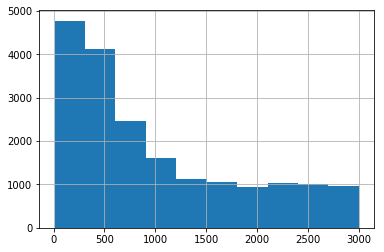

In [33]:
sorted_may_trip_promise[sorted_may_trip_promise.tripDistance<3000].tripDistance.hist()

In [34]:
# I will look the average idle time in each zones

sorted_may_trip_promise[sorted_may_trip_promise.changed==0][['ZONE_ID','idle_time']].groupby('ZONE_ID').mean()

,idle_time
ZONE_ID,
1,3240.055996
2,3403.333411
3,3390.269237
4,3223.869927
5,2975.027975
6,2890.624966


### That does not give any clue!

1) Promise zones are too big to extract meaningful comments. So I need to divide zones into regions.
2) Idle time can not be calculated by only trip data. If it is said that, scooter is available between two trips, it would be a speculation, not a fact. Hence I need availability data at this step. Idle time should be calculated by combination of availability data and trip data.

## Trip counts in square regions

First I will create square regions to divide promise zones into small regions.

In [35]:
# Creating the square regions

xmin,ymin,xmax,ymax =  promise.total_bounds   
length = 0.01
wide = 0.01

cols = list(np.arange(np.floor(xmin), np.ceil(xmax), wide))
rows = list(np.arange(np.floor(ymin), np.ceil(ymax), length))
rows.reverse()

polygons = []

for y in rows:
    for x in cols:
        polygons.append( Polygon([(x,y), (x+wide, y), (x+wide, y-length), (x, y-length)]) )

grid = gpd.GeoDataFrame({'geometry':polygons})
grid.crs = promise.crs
grid.shape

(10000, 1)

In [36]:
# Taking the intersection with promise zones

grid_promise_box = gpd.sjoin(grid, promise)

for i in range(1,7): # It will 
    grid_promise_zone = gpd.overlay(promise[promise.ZONE_ID==i], grid_promise_box[grid_promise_box.ZONE_ID==i], how = 'intersection')
    if i==1:
        grid_promise = grid_promise_zone
    else:
        grid_promise = gpd.GeoDataFrame(pd.concat([grid_promise, grid_promise_zone], ignore_index=True))
    i += 1

grid_promise = grid_promise[['ZONE_ID', 'geometry']]
grid_promise['region_id'] = grid_promise.index+1
grid_promise.crs = promise.crs

grid_promise.shape

(201, 3)

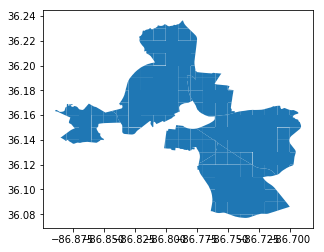

In [37]:
grid_promise.plot()

In [38]:
sorted_may_trip_promise_grid = gpd.sjoin(sorted_may_trip_promise, grid_promise, op='within')
sorted_may_trip_promise_grid = sorted_may_trip_promise_grid.sort_values(
    by=['companyName', 'sumdID', 'pubTimeStamp']).reset_index(drop=True)
sorted_may_trip_promise_grid = sorted_may_trip_promise_grid.drop(columns=['index_right','ZONE_ID_right'])
sorted_may_trip_promise_grid.shape

(36660, 25)

In [39]:
may_regions_counts = sorted_may_trip_promise_grid[['idle_time','region_id']].groupby('region_id').count()
may_regions_counts = may_regions_counts.reset_index()
may_regions_counts['geometry'] = grid_promise[grid_promise.region_id.isin(may_regions_counts.region_id)].reset_index().geometry
may_regions_counts['ZONE_ID'] = grid_promise[grid_promise.region_id.isin(may_regions_counts.region_id)].reset_index().ZONE_ID
may_regions_counts = may_regions_counts.set_geometry('geometry')
may_regions_counts = may_regions_counts.rename(columns={'idle_time': 'trip_counts'})
may_regions_counts.crs = promise.crs

In [40]:
sorted_may_trip_promise_grid.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,create_dt,geometry,ZONE_ID_left,SHAPE_STAr,SHAPE_STLe,changed,start_datetime,end_datetime,idle_time,region_id
0,2019-05-15 04:27:16.460,Bird,BRD3354,Powered125HI,22.0,4921.260,2019-05-15,04:06:44.160000,2019-05-15,04:28:24.633333,...,2019-05-16 05:30:49.727,POINT (-86.77200000000001 36.1622),1,1.053728e+08,49364.601403,0,2019-05-15 04:06:44.160000,2019-05-15 04:28:24.633333,NaN,15
1,2019-05-17 03:49:26.133,Bird,BRD3567,Powered125HI,68.0,41338.584,2019-05-17,02:42:58.946666,2019-05-17,03:50:44.820000,...,2019-05-18 05:30:46.813,POINT (-86.7698 36.1646),1,1.053728e+08,49364.601403,0,2019-05-17 02:42:58.946666,2019-05-17 03:50:44.820000,2774.571889,17
2,2019-05-24 22:03:05.157,Bird,BRD2853,Powered125HI,6.0,2296.588,2019-05-24,21:58:09.946666,2019-05-24,22:04:14.436666,...,2019-05-25 05:31:39.013,POINT (-86.8017 36.1647),5,3.928178e+08,106661.712102,0,2019-05-24 21:58:09.946666,2019-05-24 22:04:14.436666,11167.418778,142
3,2019-05-25 00:13:11.623,Bird,BRD3680,Powered125HI,6.0,4921.260,2019-05-25,00:08:23.830000,2019-05-25,00:14:21.310000,...,2019-05-26 05:30:26.190,POINT (-86.79219999999999 36.1642),5,3.928178e+08,106661.712102,0,2019-05-25 00:08:23.830000,2019-05-25 00:14:21.310000,124.156556,141
4,2019-05-04 20:20:25.630,Bird,BRD3150,Powered12J9T,4.0,656.168,2019-05-04,20:16:35.576666,2019-05-04,20:20:46.903333,...,2019-05-05 05:31:45.720,POINT (-86.7873 36.1472),2,7.670585e+07,45226.018917,1,2019-05-04 20:16:35.576666,2019-05-04 20:20:46.903333,-29037.762222,36


Time intervals may be better with 05-12-18-22-05 

In [41]:
# Creating the category for daytime, morning(05-12), afternoon(12-18), evening(18-22), night(22-05)

sorted_may_trip_promise_grid['start_hour'] = sorted_may_trip_promise_grid.startTime.astype(str).str[:2].astype(int)

def day_time(value):
    if value>=5 and value<12:
        return 'morning'
    if value>=12 and value<18:
        return 'afternoon'
    if value>=18 and value<22:
        return 'evening'
    if value>=22 or value<5:
        return 'night'
    
sorted_may_trip_promise_grid['daytime'] = sorted_may_trip_promise_grid.start_hour.apply(day_time)
sorted_may_trip_promise_grid.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,...,ZONE_ID_left,SHAPE_STAr,SHAPE_STLe,changed,start_datetime,end_datetime,idle_time,region_id,start_hour,daytime
0,2019-05-15 04:27:16.460,Bird,BRD3354,Powered125HI,22.0,4921.260,2019-05-15,04:06:44.160000,2019-05-15,04:28:24.633333,...,1,1.053728e+08,49364.601403,0,2019-05-15 04:06:44.160000,2019-05-15 04:28:24.633333,NaN,15,4,night
1,2019-05-17 03:49:26.133,Bird,BRD3567,Powered125HI,68.0,41338.584,2019-05-17,02:42:58.946666,2019-05-17,03:50:44.820000,...,1,1.053728e+08,49364.601403,0,2019-05-17 02:42:58.946666,2019-05-17 03:50:44.820000,2774.571889,17,2,night
2,2019-05-24 22:03:05.157,Bird,BRD2853,Powered125HI,6.0,2296.588,2019-05-24,21:58:09.946666,2019-05-24,22:04:14.436666,...,5,3.928178e+08,106661.712102,0,2019-05-24 21:58:09.946666,2019-05-24 22:04:14.436666,11167.418778,142,21,evening
3,2019-05-25 00:13:11.623,Bird,BRD3680,Powered125HI,6.0,4921.260,2019-05-25,00:08:23.830000,2019-05-25,00:14:21.310000,...,5,3.928178e+08,106661.712102,0,2019-05-25 00:08:23.830000,2019-05-25 00:14:21.310000,124.156556,141,0,night
4,2019-05-04 20:20:25.630,Bird,BRD3150,Powered12J9T,4.0,656.168,2019-05-04,20:16:35.576666,2019-05-04,20:20:46.903333,...,2,7.670585e+07,45226.018917,1,2019-05-04 20:16:35.576666,2019-05-04 20:20:46.903333,-29037.762222,36,20,evening


In [42]:
sorted_may_trip_promise_grid.daytime.value_counts()

night        14927
evening       9531
afternoon     9485
morning       2717
Name: daytime, dtype: int64

In [43]:
# Creating dataframes for each daytime

sorted_may_trip_promise_grid_morning = sorted_may_trip_promise_grid.groupby('daytime').get_group('morning')
sorted_may_trip_promise_grid_afternoon = sorted_may_trip_promise_grid.groupby('daytime').get_group('afternoon')
sorted_may_trip_promise_grid_evening = sorted_may_trip_promise_grid.groupby('daytime').get_group('evening')
sorted_may_trip_promise_grid_night = sorted_may_trip_promise_grid.groupby('daytime').get_group('night')

In [44]:
# Creating the map to show trip counts

map_downtown = folium.Map(location = nashville_center, zoom_start = 12)

folium.GeoJson(grid_promise,
               name='Trip counts on promise zones').add_to(map_downtown)

In [45]:
# Trip counts for all daytime

fg_may_count = folium.FeatureGroup(name='Trip counts on promise zones', overlay=True)

for row in may_regions_counts.iterrows():
    row_values = row[1]
    folium.Circle(
        location=(row_values.geometry.centroid.y,row_values.geometry.centroid.x),
        popup=('Zone: ' + str(row_values.ZONE_ID) + '<br/>' +
               'Region: ' + str(row_values.region_id) + '<br/>' +
               'Trip counts: ' + str(row_values.trip_counts)),
        radius=row_values.trip_counts/7,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(fg_may_count)
    
fg_may_count.add_to(map_downtown)

# folium.LayerControl().add_to(map_downtown)

# text = 'Trip counts on promise zones'

# iframe = folium.IFrame(text, width=250, height=35)
# popup = folium.Popup(iframe, max_width=3000)

# Text = folium.Marker(location=[ymax, xmin], popup=popup,
#                      icon=folium.Icon(icon_color='green'))
# map_downtown.add_child(Text)

# map_downtown.save('map_sefa/May_trip_counts_promise.html')

# map_downtown

In [46]:
# Trip counts for morning only

may_regions_counts_morning = sorted_may_trip_promise_grid_morning[['idle_time','region_id']].groupby('region_id').count()
may_regions_counts_morning = may_regions_counts_morning.reset_index()
may_regions_counts_morning['geometry'] = grid_promise[grid_promise.region_id.isin(may_regions_counts_morning.region_id)].reset_index().geometry
may_regions_counts_morning['ZONE_ID'] = grid_promise[grid_promise.region_id.isin(may_regions_counts_morning.region_id)].reset_index().ZONE_ID
may_regions_counts_morning = may_regions_counts_morning.set_geometry('geometry')
may_regions_counts_morning = may_regions_counts_morning.rename(columns={'idle_time': 'trip_counts'})
may_regions_counts_morning.crs = promise.crs

# map_downtown = folium.Map(location = nashville_center, zoom_start = 11)
fig_may_count_morning = folium.FeatureGroup(name='Trip counts on promise zones in the morning(05-12)', overlay=True)

for row in may_regions_counts_morning.iterrows():
    row_values = row[1]
    folium.Circle(
        location=(row_values.geometry.centroid.y,row_values.geometry.centroid.x),
        popup=('Zone: ' + str(row_values.ZONE_ID) + '<br/>' +
               'Region: ' + str(row_values.region_id) + '<br/>' +
               'Trip counts in the morning(05-12): ' + str(row_values.trip_counts)),
        radius=row_values.trip_counts/3,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(fig_may_count_morning)
    
fig_may_count_morning.add_to(map_downtown)

In [47]:
# Trip counts for afternoon only

may_regions_counts_afternoon = sorted_may_trip_promise_grid_afternoon[['idle_time','region_id']].groupby('region_id').count()
may_regions_counts_afternoon = may_regions_counts_afternoon.reset_index()
may_regions_counts_afternoon['geometry'] = grid_promise[grid_promise.region_id.isin(may_regions_counts_afternoon.region_id)].reset_index().geometry
may_regions_counts_afternoon['ZONE_ID'] = grid_promise[grid_promise.region_id.isin(may_regions_counts_afternoon.region_id)].reset_index().ZONE_ID
may_regions_counts_afternoon = may_regions_counts_afternoon.set_geometry('geometry')
may_regions_counts_afternoon = may_regions_counts_afternoon.rename(columns={'idle_time': 'trip_counts'})
may_regions_counts_afternoon.crs = promise.crs

fig_may_count_afternoon = folium.FeatureGroup(name='Trip counts on promise zones in the afternoon(12-18)', overlay=True)

for row in may_regions_counts_afternoon.iterrows():
    row_values = row[1]
    folium.Circle(
        location=(row_values.geometry.centroid.y,row_values.geometry.centroid.x),
        popup=('Zone: ' + str(row_values.ZONE_ID) + '<br/>' +
               'Region: ' + str(row_values.region_id) + '<br/>' +
               'Trip counts in the afternoon(12-18): ' + str(row_values.trip_counts)),
        radius=row_values.trip_counts/3,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(fig_may_count_afternoon)
    
fig_may_count_afternoon.add_to(map_downtown)

In [48]:
# Trip counts for evening only

may_regions_counts_evening = sorted_may_trip_promise_grid_evening[['idle_time','region_id']].groupby('region_id').count()
may_regions_counts_evening = may_regions_counts_evening.reset_index()
may_regions_counts_evening['geometry'] = grid_promise[grid_promise.region_id.isin(may_regions_counts_evening.region_id)].reset_index().geometry
may_regions_counts_evening['ZONE_ID'] = grid_promise[grid_promise.region_id.isin(may_regions_counts_evening.region_id)].reset_index().ZONE_ID
may_regions_counts_evening = may_regions_counts_evening.set_geometry('geometry')
may_regions_counts_evening = may_regions_counts_evening.rename(columns={'idle_time': 'trip_counts'})
may_regions_counts_evening.crs = promise.crs

fig_may_count_evening = folium.FeatureGroup(name='Trip counts on promise zones in the evening(18-22)', overlay=True)

for row in may_regions_counts_evening.iterrows():
    row_values = row[1]
    folium.Circle(
        location=(row_values.geometry.centroid.y,row_values.geometry.centroid.x),
        popup=('Zone: ' + str(row_values.ZONE_ID) + '<br/>' +
               'Region: ' + str(row_values.region_id) + '<br/>' +
               'Trip counts in the evening(18-22): ' + str(row_values.trip_counts)),
        radius=row_values.trip_counts/3,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(fig_may_count_evening)
    
fig_may_count_evening.add_to(map_downtown)

In [49]:
# Trip counts for night only

may_regions_counts_night = sorted_may_trip_promise_grid_night[['idle_time','region_id']].groupby('region_id').count()
may_regions_counts_night = may_regions_counts_night.reset_index()
may_regions_counts_night['geometry'] = grid_promise[grid_promise.region_id.isin(may_regions_counts_night.region_id)].reset_index().geometry
may_regions_counts_night['ZONE_ID'] = grid_promise[grid_promise.region_id.isin(may_regions_counts_night.region_id)].reset_index().ZONE_ID
may_regions_counts_night = may_regions_counts_night.set_geometry('geometry')
may_regions_counts_night = may_regions_counts_night.rename(columns={'idle_time': 'trip_counts'})
may_regions_counts_night.crs = promise.crs

fig_may_count_night = folium.FeatureGroup(name='Trip counts on promise zones in the night(22-05)', overlay=True)

for row in may_regions_counts_night.iterrows():
    row_values = row[1]
    folium.Circle(
        location=(row_values.geometry.centroid.y,row_values.geometry.centroid.x),
        popup=('Zone: ' + str(row_values.ZONE_ID) + '<br/>' +
               'Region: ' + str(row_values.region_id) + '<br/>' +
               'Trip counts in the night(22-05): ' + str(row_values.trip_counts)),
        radius=row_values.trip_counts/3,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(fig_may_count_night)
    
fig_may_count_night.add_to(map_downtown)

# map_downtown.save('map_sefa/May_trip_counts_promise_night.html')

# map_downtown

In [50]:
# Showing and saving the map

folium.LayerControl().add_to(map_downtown)
map_downtown.save('map_sefa/May_trip_counts.html')

map_downtown

## Combining the trip data with availability data and calculating average idle time

In [51]:
# Creating distance between two consecutive locations. Distance will be in km.

def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    Earth diameter is in km. Hence calculations in km.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [52]:
# Reading the melted availability data

may_melted = pd.read_csv('data/may_melted.csv')

may_melted = may_melted.drop(columns='Unnamed: 0')
may_melted.pubdatetime = pd.to_datetime(may_melted.pubdatetime)
may_melted.pubdatetime_last = pd.to_datetime(may_melted.pubdatetime_last)
may_melted.idle_time = pd.to_timedelta(may_melted.idle_time)

In [53]:
# This is the crazy part of the combination process!!!

# Subsetting the trip data to get only esential columns and renaming the columns to merge on the columns 
# pubdatetime column is the first time a scooter is at the same location for availability data
# start_datetime is the time a trip starts for trip data
# these two columns should be same for combination

trial1 = sorted_may_trip_promise.rename(columns={'start_datetime':'pubdatetime', 'sumdID': 'sumdid', 'companyName': 'companyname'})
trial1 = trial1[['pubdatetime', 'companyname', 'sumdid', 'startLatitude', 'startLongitude', 'endLatitude', 'endLongitude',
                  'end_datetime']]

# Merging two dataframes on pubdatetime so that they will be ordered in the same timeline 

may_melted = pd.merge(trial1, may_melted, on=['pubdatetime', 'companyname', 'sumdid'], 
                      how='outer').sort_values(by=['companyname', 'sumdid', 'pubdatetime']).reset_index(drop=True)

may_melted['changed'] = may_melted['sumdid'].ne(may_melted['sumdid'].shift().bfill())

may_melted.changed = may_melted.changed.fillna(False)

may_melted.head(30)

,pubdatetime,companyname,sumdid,startLatitude,startLongitude,endLatitude,endLongitude,end_datetime,latitude,longitude,distance,changed,distance_isgreater_thrsld,last_on_same_loc,pubdatetime_last,idle_time
0,2019-05-26 20:05:42.860,Bird,Powered11XTN,NaN,NaN,NaN,NaN,NaT,36.161835,-86.774021,NaN,False,False,False,2019-05-26 20:45:44.100,0 days 00:40:01.240000
1,2019-05-26 21:05:45.360,Bird,Powered11XTN,NaN,NaN,NaN,NaN,NaT,36.163459,-86.783549,1.071639,False,True,False,2019-05-26 21:45:46.647,0 days 00:40:01.287000
2,2019-05-26 22:05:47.370,Bird,Powered11XTN,NaN,NaN,NaN,NaN,NaT,36.170259,-86.788817,0.595882,False,True,False,2019-05-26 22:15:47.300,0 days 00:09:59.930000
3,2019-05-26 22:45:48.283,Bird,Powered11XTN,NaN,NaN,NaN,NaN,NaT,36.170966,-86.785398,0.437999,False,True,False,2019-05-26 22:50:48.410,0 days 00:05:00.127000
4,2019-05-26 23:15:49.113,Bird,Powered11XTN,NaN,NaN,NaN,NaN,NaT,36.171019,-86.789148,0.416981,False,True,False,2019-05-26 23:25:49.497,0 days 00:10:00.384000
5,2019-05-26 23:45:50.283,Bird,Powered11XTN,NaN,NaN,NaN,NaN,NaT,36.165110,-86.782801,0.712109,False,True,False,2019-05-26 23:55:50.640,0 days 00:10:00.357000
6,2019-05-27 01:35:53.887,Bird,Powered11XTN,NaN,NaN,NaN,NaN,NaT,36.160072,-86.778279,0.606997,False,True,False,2019-05-27 01:40:53.993,0 days 00:05:00.106000
7,2019-05-27 01:50:54.407,Bird,Powered11XTN,NaN,NaN,NaN,NaN,NaT,36.158076,-86.785070,0.755228,False,True,False,2019-05-27 02:50:55.817,0 days 01:00:01.410000
8,2019-05-27 03:15:56.583,Bird,Powered11XTN,NaN,NaN,NaN,NaN,NaT,36.160190,-86.778609,0.625303,False,True,False,2019-05-27 03:20:57.150,0 days 00:05:00.567000
9,2019-05-28 09:57:01.570,Bird,Powered11XTN,NaN,NaN,NaN,NaN,NaT,36.145929,-86.811672,3.677507,False,True,False,2019-05-29 00:17:33.707,0 days 14:20:32.137000


In [54]:
# If a row says that a scooter is available at "location a" from time "t1" to "t2"
#     and the following row says that a trip started from the same "location a" (in the range of 250 meters) in a time "t3"
#         assign "t3" to "t1" since it is actually available at "location a" until starting a trip
# Ignore this change, if scooter id is changing 

may_melted.pubdatetime_last = np.where((~may_melted.changed) & (~(may_melted.changed.shift(-1).fillna(False))) & 
                                       (~(may_melted.changed.shift(-2).fillna(False))) & 
                                       (haversine(may_melted.latitude,may_melted.longitude, 
                                               may_melted.startLatitude.shift(-1), may_melted.startLongitude.shift(-1))<=0.25),
                                  may_melted.pubdatetime.shift(-1),
                                  may_melted.pubdatetime_last)

# If a row says that a scooter is available at "location a" from time "t1" to "t2"
#     and the previous row says that a trip ended at the same "location a" (in the range of 250 meters) in a time "t3"
#         assign "t3" to "t1" since it is actually available at "location a" from the end of the previous trip
# Ignore this change, if scooter id is changing 

may_melted.pubdatetime = np.where((~may_melted.changed) & (~(may_melted.changed.shift(-1).fillna(False))) & 
                                       (~(may_melted.changed.shift(-2).fillna(False))) & 
                                       (haversine(may_melted.endLatitude.shift(),may_melted.endLongitude.shift(),
                                      may_melted.latitude, may_melted.longitude)<=0.25),
                             may_melted.end_datetime.shift(),
                             may_melted.pubdatetime)

# If a row says that a scooter is available at a location from time "t1" to "t2"
#     and the following row says that a trip started from any location in a time "t3" between "t1" and "t2"
#         assign "t3" to "t1" since it is actually not available after starting a trip
# Ignore this change, if scooter id is changing 

may_melted.pubdatetime_last = np.where((~may_melted.changed) & (~(may_melted.changed.shift(-1).fillna(False))) & 
                                       (~(may_melted.changed.shift(-2).fillna(False))) & 
                                       (may_melted.pubdatetime_last > may_melted.pubdatetime.shift(-1)),
                                  may_melted.pubdatetime.shift(-1),
                                  may_melted.pubdatetime_last)

# If a row says that a scooter is available at a location from time "t1" to "t2"
#     and the previous row says that a trip ended at any location in a time "t3" between "t1" and "t2"
#         assign "t3" to "t2" since it is actually not available before ending a trip
# Ignore this change, if scooter id is changing 

may_melted.pubdatetime = np.where((~may_melted.changed) & (~(may_melted.changed.shift(-1).fillna(False))) & 
                                       (~(may_melted.changed.shift(-2).fillna(False))) & 
                                       (may_melted.end_datetime.shift() > may_melted.pubdatetime),
                             may_melted.end_datetime.shift(),
                             may_melted.pubdatetime)

# If a row says that a scooter is available at a location from time "t1" to "t2"
#     and the previous row says that a trip ended at any location in a time "t3" after "t2"
#         assign latitude/longitude to None in order to delete that row since it is actually not available before ending a trip
# Ignore this change, if scooter id is changing 

may_melted.latitude = np.where((~may_melted.changed) &
                                       (may_melted.end_datetime.shift() > may_melted.pubdatetime_last),
                             None,
                             may_melted.latitude)

may_melted.longitude = np.where((~may_melted.changed) &
                                       (may_melted.end_datetime.shift() > may_melted.pubdatetime_last),
                             None,
                             may_melted.longitude)

# There is no need to repeat this very last step for the beginig of availability because I sorted the data by starting times
# If a row says that a scooter is available at a location from time "t1" to "t2"
#     and the following row says that a trip started at any location in a time "t3"
#         "t3" is always after "t1" since it is sorted by that column

# Drop the columns belonging only the trip data

may_melted = may_melted.drop(columns=['startLatitude', 'startLongitude', 'endLatitude', 'endLongitude', 'end_datetime'])

# Calculate the idle time from the availability data

may_melted.idle_time = may_melted.pubdatetime_last - may_melted.pubdatetime

# Drop the rows if latitude/longitude is None
#     It means drop the rows if it belongs to trip data or the rows tells that scooter is avialable but the scooter is not actually available

may_melted = may_melted.dropna(subset=['latitude', 'longitude']).reset_index(drop=True)

may_melted.head(60).tail(30)

c:\programdata\anaconda3\envs\tmp\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':
c:\programdata\anaconda3\envs\tmp\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less_equal


,pubdatetime,companyname,sumdid,latitude,longitude,distance,changed,distance_isgreater_thrsld,last_on_same_loc,pubdatetime_last,idle_time
30,2019-05-04 17:35:06.000,Bird,Powered125HI,36.1659,-86.7792,0.317835,False,True,False,2019-05-04 18:05:07.000,0 days 00:30:01
31,2019-05-04 23:35:20.000,Bird,Powered125HI,36.1523,-86.7911,1.307816,False,True,False,2019-05-05 00:35:22.000,0 days 01:00:02
32,2019-05-05 00:40:22.000,Bird,Powered125HI,36.1444,-86.7936,0.250054,False,True,False,2019-05-05 01:00:23.000,0 days 00:20:01
33,2019-05-05 01:40:25.000,Bird,Powered125HI,36.1547,-86.7849,0.758858,False,True,False,2019-05-05 05:00:31.000,0 days 03:20:06
34,2019-05-06 10:36:39.320,Bird,Powered125HI,36.1671,-86.7797,0.785902,False,True,False,2019-05-07 23:38:05.727,1 days 13:01:26.407000
35,2019-05-08 09:43:29.107,Bird,Powered125HI,36.1578,-86.7735,0.692367,False,True,False,2019-05-08 15:08:41.940,0 days 05:25:12.833000
36,2019-05-08 15:08:41.940,Bird,Powered125HI,36.1572,-86.776,0.278903,False,True,True,2019-05-08 15:08:41.940,0 days 00:00:00
37,2019-05-08 15:13:41.953,Bird,Powered125HI,36.1578,-86.7737,0.256221,False,True,False,2019-05-08 22:04:00.650,0 days 06:50:18.697000
38,2019-05-08 22:13:58.757,Bird,Powered125HI,36.1586,-86.781,0.622351,False,True,False,2019-05-10 13:45:30.753,1 days 15:31:31.996000
39,2019-05-10 13:45:30.753,Bird,Powered125HI,36.1615,-86.7777,0.361493,False,True,True,2019-05-10 13:45:30.753,0 days 00:00:00


In [55]:
may_melted.shape

(288483, 11)

In [56]:
# Creating a geometry column for availability data and converting it to geodataframe

may_melted['geometry'] = may_melted.apply(lambda x: Point((float(x.longitude), float(x.latitude))), axis=1)
may_melted_geo = gpd.GeoDataFrame(may_melted, crs = grid_promise.crs, geometry = may_melted['geometry'])

# Joining this dataframe with promise zones and regions

may_melted_grid_promise = gpd.sjoin(may_melted_geo, grid_promise, op = 'within')
may_melted_grid_promise = may_melted_grid_promise.sort_values(by=['companyname', 'sumdid', 'pubdatetime']).reset_index(drop=True)
may_melted_grid_promise.head()

,pubdatetime,companyname,sumdid,latitude,longitude,distance,changed,distance_isgreater_thrsld,last_on_same_loc,pubdatetime_last,idle_time,geometry,index_right,ZONE_ID,region_id
0,2019-05-26 22:05:47.370,Bird,Powered11XTN,36.1703,-86.7888,0.595882,False,True,False,2019-05-26 22:15:47.300,00:09:59.930000,POINT (-86.78881700000002 36.170259),122,5,123
1,2019-05-26 22:45:48.283,Bird,Powered11XTN,36.171,-86.7854,0.437999,False,True,False,2019-05-26 22:50:48.410,00:05:00.127000,POINT (-86.785398 36.170966),122,5,123
2,2019-05-26 23:15:49.113,Bird,Powered11XTN,36.171,-86.7891,0.416981,False,True,False,2019-05-26 23:25:49.497,00:10:00.384000,POINT (-86.789148 36.171019),122,5,123
3,2019-05-31 23:10:19.430,Bird,Powered11XTN,36.1633,-86.7914,0.780137,False,True,False,2019-05-31 23:25:19.757,00:15:00.327000,POINT (-86.791416 36.163344),140,5,141
4,2019-05-31 23:35:19.977,Bird,Powered11XTN,36.1737,-86.7853,0.673293,False,True,False,2019-05-31 23:55:21.047,00:20:01.070000,POINT (-86.785347 36.173721),122,5,123


In [57]:
# Dataframe having total idle times for each scooter in each region

may_idle_regions = may_melted_grid_promise[['idle_time', 'ZONE_ID', 'region_id', 'sumdid']].groupby(by=['ZONE_ID', 'region_id', 'sumdid']).sum().reset_index()
may_idle_regions.idle_time = may_idle_regions.idle_time.dt.total_seconds()/60 # in minutes
may_idle_regions

,ZONE_ID,region_id,sumdid,idle_time
0,1,1,Powered-2651de71-6602-3b70-5d9b-990dc39b34b3,970.700000
1,1,1,Powered-56501edb-693c-9de3-4e13-77f790076c9a,835.533333
2,1,1,Powered-8506e49a-1f9d-fbed-5321-6f6dc0d44529,165.100000
3,1,1,Powered-8b75029d-3a17-ab25-9ca3-4cc4511f6622,195.116667
4,1,1,Powered0eec3ff0-7d7d-5b65-9f7b-0ad96c6790df,10.016667
5,1,1,Powered118218,1585.680222
6,1,1,Powered22JP4HZ2Z3CGE,125.060217
7,1,1,Powered2TYUB,773.829617
8,1,1,Powered32W3O4U3TKJRM,240.176333
9,1,1,Powered34ZSQ3V4KEPAS,0.000000


In [58]:
# Dataframe having the number of available scooters in each region during the month of May

may_region_sct_cnts = may_idle_regions[['ZONE_ID', 'region_id', 'sumdid']].groupby(by = ['ZONE_ID', 'region_id']).count().reset_index()

may_region_sct_cnts = may_region_sct_cnts.rename(columns={'sumdid': 'number_of_scooters_available'})

may_region_sct_cnts.head()

,ZONE_ID,region_id,number_of_scooters_available
0,1,1,103
1,1,2,32
2,1,4,192
3,1,5,385
4,1,6,4


In [59]:
# Dataframe having the average idle time of available scooters in each region during the month of May

may_regions_avg_idle = may_idle_regions.groupby('region_id').mean().reset_index().rename(columns={'idle_time':'avg_idle_time'})

may_regions_avg_idle.head()

,region_id,ZONE_ID,avg_idle_time
0,1,1,630.952542
1,2,1,326.349339
2,4,1,509.299153
3,5,1,767.726871
4,6,1,96.322304


In [60]:
# Dataframe having the number of available scooters and the average idle time of these scooters in each region during the month of May
# the approximate daily trip counts per scooter calculated by dividing 24 hours to the average idle time(in hours)

may_regions = pd.merge(may_region_sct_cnts, may_regions_avg_idle, on=['ZONE_ID', 'region_id'])

may_regions['avg_daily_trips_per_sctr'] = np.round(24/(may_regions.avg_idle_time/60),decimals=1)

may_regions = pd.merge(may_regions, grid_promise, on=['ZONE_ID','region_id'], how='left')

may_regions.head()

c:\programdata\anaconda3\envs\tmp\lib\site-packages\pandas\core\series.py:1999: RuntimeWarning: invalid value encountered in rint
  result = com.values_from_object(self).round(decimals)


,ZONE_ID,region_id,number_of_scooters_available,avg_idle_time,avg_daily_trips_per_sctr,geometry
0,1,1,103,630.952542,2.3,POLYGON ((-86.76297000024967 36.19363899926637...
1,1,2,32,326.349339,4.4,POLYGON ((-86.75999999999988 36.19393007964455...
2,1,4,192,509.299153,2.8,"POLYGON ((-86.75999999999988 36.1862439993298,..."
3,1,5,385,767.726871,1.9,POLYGON ((-86.75999999999988 36.18511433371195...
4,1,6,4,96.322304,14.9,POLYGON ((-86.78215669565431 36.18999999999996...


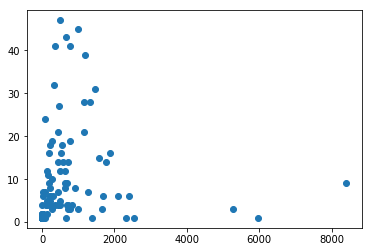

In [61]:
plt.scatter(may_regions[may_regions.number_of_scooters_available<50].avg_idle_time, may_regions[may_regions.number_of_scooters_available<50].number_of_scooters_available)

In [62]:
# Converting dataframe to geodataframe

may_regions = may_regions.set_geometry('geometry')
may_regions.crs = grid_promise.crs

type(may_regions)

geopandas.geodataframe.GeoDataFrame

In [63]:
may_regions.head()

,ZONE_ID,region_id,number_of_scooters_available,avg_idle_time,avg_daily_trips_per_sctr,geometry
0,1,1,103,630.952542,2.3,POLYGON ((-86.76297000024967 36.19363899926637...
1,1,2,32,326.349339,4.4,POLYGON ((-86.75999999999988 36.19393007964455...
2,1,4,192,509.299153,2.8,"POLYGON ((-86.75999999999988 36.1862439993298,..."
3,1,5,385,767.726871,1.9,POLYGON ((-86.75999999999988 36.18511433371195...
4,1,6,4,96.322304,14.9,POLYGON ((-86.78215669565431 36.18999999999996...


In [64]:
# Creating map and ploting the promise zones and regions
# the radius of each circle is proportional to the average idle time

map_idle = folium.Map(location = nashville_center, zoom_start = 12)

folium.GeoJson(grid_promise,
               name='Average idle times on promise zones').add_to(map_idle)

# Creating the featuregroup for average idle time bubbles for each region

fig_may_idle = folium.FeatureGroup(name='Average idle times on promise zones', overlay=True)

for row in may_regions.iterrows():
    row_values = row[1]
    
    opa = 0.7 if row_values.number_of_scooters_available>350 else row_values.number_of_scooters_available/500.0
    
    folium.Circle(
        location=(row_values.geometry.centroid.y, row_values.geometry.centroid.x),
        popup=('Zone: ' + str(row_values.ZONE_ID) + '<br/>' +
               'Region: ' + str(row_values.region_id) + '<br/>' +
               'Average idle time: ' + str(np.round(row_values.avg_idle_time/60,decimals=1)) + ' hours' + '<br/>' +
               'Number of scooters available in this region: ' + str(row_values.number_of_scooters_available)),
        radius=np.sqrt(np.sqrt(row_values.avg_idle_time))*(50 if row_values.avg_idle_time/60<24 else 65) ,
        color='crimson',
        fill_opacity = opa,
        fill=True,
        fill_color='crimson'
    ).add_to(fig_may_idle)
    
fig_may_idle.add_to(map_idle)


In [65]:
# Creating the featuregroup for approximate daily trips per scooter bubbles for each region
# the radius of each circle is proportional to the approximate daily trip counts per scooter

fig_may_avg_daily = folium.FeatureGroup(name='Approximate daily trips per scooter on promise zones', overlay=True)

for row in may_regions[may_regions.number_of_scooters_available>25].iterrows():
    row_values = row[1]
    
    opa = 0.7 if row_values.number_of_scooters_available>350 else row_values.number_of_scooters_available/500.0
    
    folium.Circle(
        location=(row_values.geometry.centroid.y, row_values.geometry.centroid.x),
        popup=('Zone: ' + str(row_values.ZONE_ID) + '<br/>' +
               'Region: ' + str(row_values.region_id) + '<br/>' +
               'Average idle time: ' + str(np.round(row_values.avg_idle_time/60,decimals=1)) + ' hours' + '<br/>' +
               'Number of scooters available in this region: ' + str(row_values.number_of_scooters_available) + '<br/>' +
               'Approximate daily trips per scooter: ' + str(row_values.avg_daily_trips_per_sctr)),
        radius=((row_values.avg_daily_trips_per_sctr))*150,
        color='crimson',
        fill_opacity = opa,
        fill=True,
        fill_color='crimson'
    ).add_to(fig_may_avg_daily)
    
fig_may_avg_daily.add_to(map_idle)


In [66]:
# Showing and saving map
# the solidity of each circle gives the number of scooters available at least once in the region
#     more solid means more scooter
# the number of scooter number is important since these averages or approximations are closer to the truth with more scooter


folium.LayerControl().add_to(map_idle)
map_idle.save('map_sefa/May_avg_idle_and_daily_trip.html')
map_idle

### Feature works:

* Calculating the area of regions and take this data into account for density of scooters
* Dividing the time into smaller parts from a whole month(It could be by day or by day-daytime) showing how many scooters available in each region in each time interval. Hence we can look closer and see the trend in timeline.